In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,cross_val_score,GridSearchCV
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
dd=pd.read_csv('Downloads/Heart_Disease .csv')
df=pd.DataFrame(dd)

In [3]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
restbp        int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca           object
thal         object
Diseased      int64
dtype: object


In [4]:
df['ca']=df['ca'].replace(['?'],None)
df['thal']=df['thal'].replace(['?'],None)
df['ca']=pd.to_numeric(df['ca'],errors='coerce')
df['thal']=pd.to_numeric(df['thal'],errors='coerce')
df['ca']=df['ca'].fillna(df['ca'].mean())
df['thal']=df['thal'].fillna(df['thal'].mean())

In [5]:
print(df.dtypes)
print()
print(df.isnull().sum)

age           int64
sex           int64
cp            int64
restbp        int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
Diseased      int64
dtype: object

<bound method NDFrame._add_numeric_operations.<locals>.sum of        age    sex     cp  restbp   chol    fbs  restecg  thalach  exang  \
0    False  False  False   False  False  False    False    False  False   
1    False  False  False   False  False  False    False    False  False   
2    False  False  False   False  False  False    False    False  False   
3    False  False  False   False  False  False    False    False  False   
4    False  False  False   False  False  False    False    False  False   
..     ...    ...    ...     ...    ...    ...      ...      ...    ...   
298  False  False  False   False  False  False    False    False  False   
299  False  False  False   False  False  Fa

In [6]:
x=df.drop('Diseased',axis=1)
y=df['Diseased']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10,min_samples_leaf=5)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [8]:
# plt.figure(figsize=(15,10))
# plot_tree(dt,class_names=['0','1'],filled=True)
# plt.show()

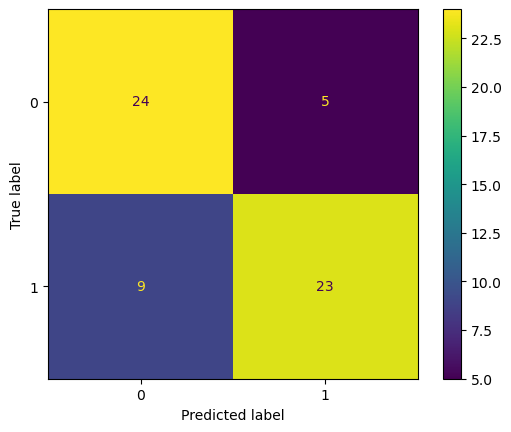

In [9]:
ypred=dt.predict(x_test)
confm=confusion_matrix(y_test,ypred)
dis=ConfusionMatrixDisplay(confusion_matrix=confm)
dis.plot()
plt.show()

[0.76190476 0.85714286 0.9047619  0.55       0.95       0.85
 0.8        0.85       0.6        0.6        0.65       0.8
 0.7        0.75       0.7       ]


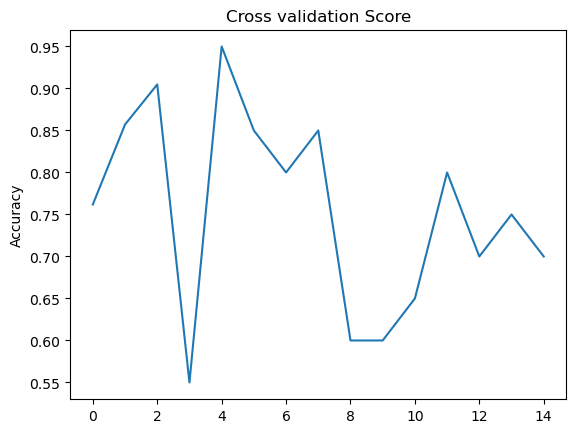

In [21]:
cvs=cross_val_score(dt,x,y,cv=15)
print(cvs)
plt.plot(cvs)
plt.title('Cross validation Score')
plt.ylabel('Accuracy')
plt.show()

In [11]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


In [12]:
fm=rf.feature_importances_
print('feature importance')
for feature,importance in zip(x.columns,fm):
    print(f"{feature}:{importance:.4f}")

feature importance
age:0.1040
sex:0.0375
cp:0.1258
restbp:0.0750
chol:0.0820
fbs:0.0132
restecg:0.0201
thalach:0.1112
exang:0.0511
oldpeak:0.1126
slope:0.0563
ca:0.1097
thal:0.1015


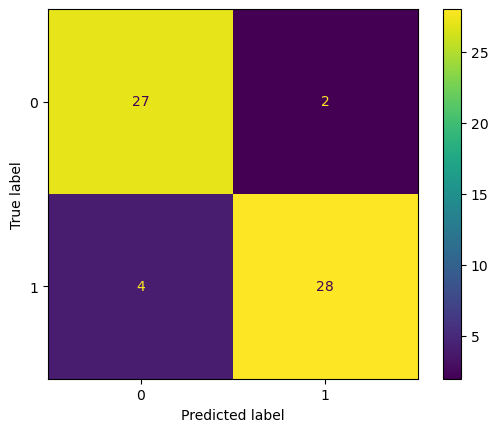

In [13]:
cnf=confusion_matrix(y_test,y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cnf)
display.plot()
plt.show()

[0.91176471 0.82352941 0.88235294 0.91176471 0.91176471 0.73529412
 0.72727273 0.75757576 0.78787879]


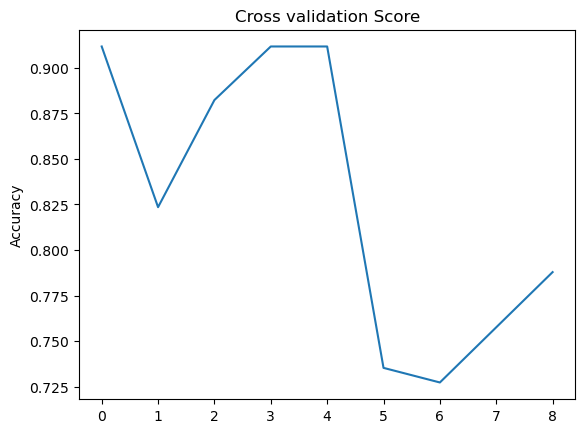

In [22]:
cv_sc=cross_val_score(rf,x,y,cv=9)
print(cv_sc)
plt.plot(cv_sc)
plt.title('Cross validation Score')
plt.ylabel('Accuracy')
plt.show()

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [25]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[5,10,20,None],
    'max_features':['sqrt','log2']
}
gsw=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=0)
gsw.fit(x_train,y_train)
be=gsw.best_estimator_
yp=be.predict(x_test)

In [26]:
print('optimal paramters')
op=gsw.best_params_
h=op['n_estimators']
print(f'optimal Number of Trees:{h}')
hh=op['max_depth']
print(f'Optimal maximum depth.:{hh}')
xx=op['max_features']
print(xx)
if xx=='sqrt':
    ans=np.sqrt(len(x.columns))
    ans=np.floor(ans)
    print(f'optimal number of features {ans}')
elif xx=='log2':
    ans=np.log2(len(x.columns))
    ans=np.floor(ans)
    print(f'optimal number of features {ans}')


optimal paramters
optimal Number of Trees:100
Optimal maximum depth.:5
sqrt
optimal number of features 3.0
